In [12]:
from math import sqrt

plot1 =[1,3]
plot2 =[2,5]

euclidean_dist = sqrt(((plot1[0]-plot2[0])**2)+((plot1[1]-plot2[1])**2))
euclidean_dist


2.23606797749979

In [11]:
esum= 0
for i in range(len(plot1)):
    e1 = ((plot1[i]-plot2[i])**2)
    esum += e1
    
euclidean_dist = sqrt(esum)
euclidean_dist

2.23606797749979

In [41]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import pandas as pd
import random
# from collections import Counter instead of counter we can use set(list_name)
%matplotlib inline
style.use('fivethirtyeight')

In [42]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

new_features = [5,7]

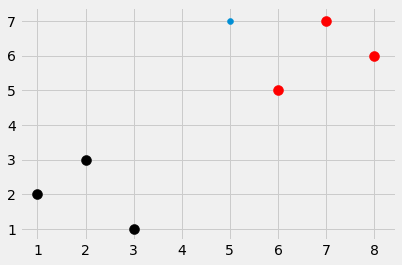

In [43]:
"""
for i in dataset:
     for ii in dataset[i]:
            plt.scatter(ii[0],ii[1], s=100, color =i)
#Ths is equivalent to the one line forloop below
"""
[[[plt.scatter(ii[0],ii[1], s=100, color =i)] for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1])
plt.show()

In [86]:
accs=[]
for ij in range(5):
    def k_nearest_neighbors(data,predict,k=3):
        if len(data)<= k:
            warnings.warn('K is set to a value less than total voting groups')
        distances=[]
        for group in data:
            for features in data[group]:
                #euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2)) OR
                euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
                distances.append([euclidean_distance, group])

        votes = [i[1] for i in sorted(distances)[:k]]
        votes_results = Counter(votes).most_common(1)[0][0]
        confidence = Counter(votes).most_common(1)[0][1] / k

        #print(votes_results, confidence)
        return votes_results, confidence

In [87]:
pred = k_nearest_neighbors(dataset,new_features,k=3)
pred

C:\Users\mrudulbanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: K is set to a value less than total voting groups
  """


('r', 1.0)

In [88]:
df = pd.read_csv('breast_cancer.txt')
list(df)
df.replace('?',-99999, inplace=True)
df.drop(['id'],1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)
full_data

[[4.0, 1.0, 5.0, 8.0, 6.0, 5.0, 8.0, 7.0, 10.0, 1.0],
 [2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
 [2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
 [4.0, 8.0, 10.0, 10.0, 8.0, 5.0, 10.0, 7.0, 8.0, 1.0],
 [4.0, 7.0, 6.0, 10.0, 5.0, 3.0, 10.0, 9.0, 10.0, 2.0],
 [4.0, 7.0, 9.0, 4.0, 10.0, 10.0, 3.0, 5.0, 3.0, 3.0],
 [4.0, 6.0, 6.0, 7.0, 10.0, 3.0, 10.0, 8.0, 10.0, 2.0],
 [2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
 [2.0, 5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
 [2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0],
 [2.0, 3.0, 2.0, 2.0, 1.0, 4.0, 3.0, 2.0, 1.0, 1.0],
 [2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [4.0, 4.0, 2.0, 3.0, 5.0, 3.0, 8.0, 7.0, 6.0, 1.0],
 [2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
 [4.0, 10.0, 5.0, 7.0, 3.0, 3.0, 7.0, 3.0, 3.0, 8.0],
 [4.0, 6.0, 10.0, 2.0, 8.0, 10.0,

In [89]:
from collections import defaultdict
test_size = 0.2
train_set = defaultdict(list)
#train_set = {2:[],4:[]}
test_set = defaultdict(list)
#test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [90]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [92]:
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        votes, confidence = k_nearest_neighbors(train_set,data,k=5)
        if group == votes:
            correct +=1
        #else:
            #print("Incorrect", confidence)
        total +=1
accuracy = correct/total
#print(votes, confidence, accuracy)
accs.append(accuracy)
print(sum(accs)/len(accs))

0.7913669064748201
